## Clustering

A large aspect of machine learning algorithms involve *clustering* data into groups based on various criteria. Generally these criteria include a prespecified number of clusters such as in K-means. Gaussian Mixture Models (GMMs) impose a distribution on the data and estimate both the mean vectors and covariance matrix. Others such as DBSCAN focus on clustering the data into a number of groups and include outliers as a separate group.

We can use libraries in Python such as <a rel="nofollow" target="_blank" href="http://scikit-learn.org/stable/">scikit-learn</a> for clustering algorithms, and <a rel="nofollow" target="_blank" href="https://pandas.pydata.org/">Pandas</a> to import data as data frames. These can be installed and imported into Python as follows:

```sh
python3 -m pip install sklearn
python3 -m pip install pandas
```

In [20]:
import sklearn as sk
import pandas as pd

### K means

K means clustering is useful when we have a predefined number of clusters, *k*. This algorithm groups the data into clusters based on iterative calculations of the mean of each cluster (which starts with a random assignment).

If we look at R.A. Fisher's <a rel="nofollow" target="_blank" href="https://archive.ics.uci.edu/ml/datasets/iris">iris dataset</a>, we can use clustering algorithms to cluster the data into three groups, which represent three different species of flowers. To do this, we make a data matrix of the variables we wish to cluster based on, which in this case are *Sepal Length*, *Sepal Width*, *Petal Length* and *Petal Width*.

A plot of the three species based on *Petal Length* and *Petal Width* is shown below. We will use this to compare the results of the different clustering algorithms to the actual distribution of species.

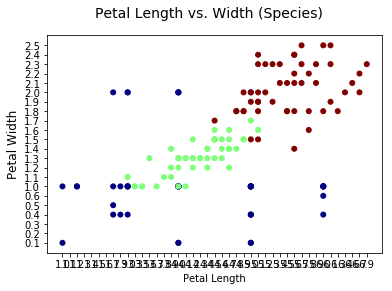

In [15]:
fig = plt.figure()
fig.suptitle("Petal Length vs. Width (Species)",fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel("Petal Length",fontsize=10)
ax.set_ylabel("Petal Width",fontsize=12)

pl = iris.loc[:,['Petal.Length']]
pw = iris.loc[:,['Petal.Width']]

ax.scatter(pl,pw,s=100,c=species, marker = '.', cmap = cm.jet);

plt.show()

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn as sk
import pandas as pd
import os

os.chdir('/Users/stevenhurwitt/Documents/Blog/Clustering')

#read in iris data, make data matrix
iris = pd.read_csv('iris.csv', sep = ",", header = 0)
iris.head()
X = iris.loc[:,['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]

#k means clustering
kmeans = KMeans(n_clusters=3, init = 'random', n_init = 25,
                precompute_distances = True, max_iter = 500, tol = .00001).fit(X)

#save clusters, turn species into numbers
clusters = pd.DataFrame(kmeans.labels_)
species = pd.DataFrame(iris.loc[:,['Species']])
replace_map = {'Species': {'setosa':1, 'versicolor':0, 'virginica':2}}
species.replace(replace_map, inplace = True)


Once we cluster the data, we can plot *Petal Length* vs. *Petal Width* and color-code it by cluster.

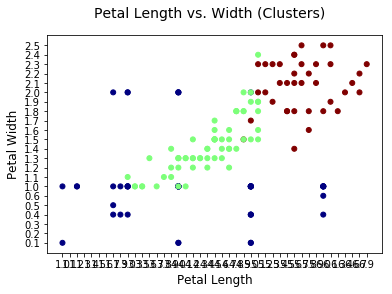

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.suptitle("Petal Length vs. Width (K means)",fontsize=14)
ax.set_xlabel("Petal Length",fontsize=12)
ax.set_ylabel("Petal Width",fontsize=12)

pl = iris.loc[:,['Petal.Length']]
pw = iris.loc[:,['Petal.Width']]

ax.scatter(pl,pw,s=100,c=clusters, marker = '.', cmap = cm.jet);

plt.show()


### Gaussian Mixture Models

Gaussian Mixture Models are a more sophisticated clustering algorithm than K means. Instead of basing the cluster membership on the distance to the center, it is assumed that each cluster follows a normal distribution with a certain *mean*, *covariance* and *probability*. After learning these for each cluster, the probability of each point belonging to every cluster is calculated and used to assign membership.

Generally, we use *training* and *test* datasets to fit GMM's. This is shown here, but the final trained model is used to predict the groups for the entire dataset which is **not** statistically valid. It is done here to compare with K means.

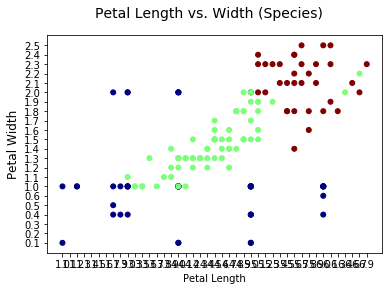

In [22]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn as sk
import pandas as pd
import numpy as np

train_ind = np.random.choice(150, 120, replace = False)
X_tr = np.array(X)[train_ind]
X_test = np.array(X)[[i for i in range(150) if i not in train_ind]]

gmm = GaussianMixture(n_components=3).fit(X_tr)
gmm.predict(X_test)

groups = pd.DataFrame(gmm.predict(X))

fig = plt.figure()
fig.suptitle("Petal Length vs. Width (GMM)",fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel("Petal Length",fontsize=10)
ax.set_ylabel("Petal Width",fontsize=12)

pl = iris.loc[:,['Petal.Length']]
pw = iris.loc[:,['Petal.Width']]

ax.scatter(pl,pw,s=100,c=groups, marker = '.', cmap = cm.jet);

plt.show()

We can see from this image that GMM's perform better than K means, which is a result of them assuming a normal distribution with specific parameters. K means simply calculates the distance from each point to the mean of the group.

### DBSCAN

DBSCAN is much more flexible than both K means and GMMs. It bases cluster membership on a predefined *epsilon*, which is the radius of a circle encompassing each cluster, along with a minimum number of points to define a cluster.

This is useful because in some applications it can cluster data into groups, along with a group of outliers. It is more time-consuming to use solely because *eps* and *min_samples* will need to be experimented with for different datasets and use cases.

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np

db_clusters = DBSCAN(eps = .4, min_samples=5).fit(X)
dbc = pd.DataFrame(db_clusters.labels_+1)

fig = plt.figure()
fig.suptitle("Petal Length vs. Width (DBSCAN)",fontsize=14)
ax = fig.add_subplot(111)
ax.set_xlabel("Petal Length",fontsize=10)
ax.set_ylabel("Petal Width",fontsize=12)

pl = iris.loc[:,['Petal.Length']]
pw = iris.loc[:,['Petal.Width']]

ax.scatter(pl,pw,s=100,c=dbc, marker = '.', cmap = cm.jet);

plt.show()

### Conclusion

In this post we looked at three different clustering algorithms. Although the end result is similar, each algorithm works in subtly different ways. We saw K means, which assigns membership based on distance to a group centroid. We looked at GMMs, which are similar to K means except that they define different Gaussian distributions (with parameters *mean*, *covariance*, and *probability*) for each cluster, which are used to assign membership. Finally we looked at DBSCAN, which is a flexible clustering algorithm that only needs a radius and minimum number of samples to assign cluster membership.